# Solutions to Exercises in Data Analysis

### Exercise: Summarizing a data set with statistics.

In [2]:
summary(discoveries)

sd(discoveries)

## an alternative way to get the quartiles
quantile(discoveries, probs=c(.25,.50,.75))

table(discoveries) # shows that the mode is 2

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0     2.0     3.0     3.1     4.0    12.0 

[1] 2.254065

25% 50% 75% 
  2   3   4

discoveries
 0  1  2  3  4  5  6  7  8  9 10 12 
 9 12 26 20 12  7  6  4  1  1  1  1 

From the summary, we can see that mininum = 0, maximum = 12, mean = 3.1, median = 3, first quartile = 2, and third quartile = 4. The standard deviation is about 2.25. The table of counts shows that the mode is 2.

### Exercise: Point estimate of a population mean

In [3]:
x <- c(73,69,65,70,67,67,78,72,74,71,70,69,70,67,68,73,70,77,72,69)
n <- length(x)

# follow the formula for the point estimate and the standard
# error of a sample mean
(xbar <- sum(x)/n)
(se <- sqrt((1/(n-1))*sum((x-xbar)^2))/sqrt(n))

[1] 70.55

[1] 0.7415311

### Exercise: Standard error when estimating a proportion
Let $\hat{p}$ be the estimate of the true overall proportion of
  people who prefer online classes. An unbiased point estimate for $p$
  is
  $$\hat{p} = \frac{424}{1200} = 0.3533$$
  The standard error of $\hat{p}$ is
  $$
  \begin{align*}
  s.e(\hat{p}) &= \sqrt{\frac{\hat{p}(1-\hat{p})}{n}} \\
  &= \sqrt{\frac{0.3533(1-0.3533)}{1200}} \\
  &= 0.0138
  \end{align*}
  $$

### Exercise: Lognormal distribution parameter estimation.
The estimated parameters of the Lognormal distribution are $\mu = 7.36$ and $\sigma = 1.155$. They represent
the mean and standard deviation, respectively, of the logarithms of the observations. Using the estimated parameters and converting back to the scale of the data, the estimated mean time to failure is 3070 hours. To get the probability that failure will occur after 10,000 hours, we can use tabulated values from the Normal distribution if we work on the log scale. Standardizing and using pnorm(), we get $p \approx 0.055$.

In [2]:
## Exercise: Lognormal distribution
Lifetimes <- read.table("../data/component-lifetimes.txt", header=T)

(mu <- mean(log(Lifetimes$t)))
(sigma <- sd(log(Lifetimes$t)))

## mean time to failure
(mttf <- exp(mu + (sigma^2)/2))

## probability that a component lasts longer than 10,000 hours
(p <- 1 - pnorm((log(10000)-mu)/sigma))

[1] 7.362768

[1] 1.154715

[1] 3070.056

[1] 0.05479656

### Exercise: Confidence interval for a mean.

In [3]:
Service <- read.table("../data/restaurant-service-times.txt", header=T)

alpha <- 0.05 # the confidence level
n <- nrow(Service) 
xbar <- mean(Service$t)
se <- sd(Service$t)/sqrt(n)
cp <- qnorm(1 - alpha/2) # critical point using std normal distribution

xbar + c(-1,1) * cp * se # a 95% confidence interval

[1] 69.71662 74.78338

Since there are 220 observations we can use the critical points from the standard Normal distribution. The Central Limit Theorem applies to this data because service times in a restaurant are the sum of several random quantities: the business of the restaurant, the time required to prepare the food that is ordered, the motivation of the server, the speed with which the customers eat, etc.

### Exercise: Validation of a simulation model.

Using the simulation output, we can construct a 95\% confidence
  interval for the mean number of jobs in the shop. If the the CI
  contains 22.5, then we will conclude that the simulation output
  is consistent with the real system behavior (with a confidence level
  of 95\%). Note that we have $n=30$ observations, so we should use the
  normal distribution. The formula for the confidence interval is
   $$\bar{X} \pm z_{1-\frac{\alpha}{2}} \times \frac{S}{\sqrt{n}}$$

In [1]:
Sim <- read.table("../data/job-shop-wip.txt", header=T)

alpha <- 0.05 # the confidence level
n <- 30 
xbar <- mean(Sim$jobs)
se <- sd(Sim$jobs)/sqrt(n)
cp <- qnorm(1 - alpha/2) # critical point using std normal distribution

xbar + c(-1,1) * cp * se # a 95% confidence interval

[1] 20.15466 21.07867

  The resulting CI is (20.15, 21.07), so we can conclude that the
  simulation output is not consistent with system behavior.

### Exercise: Bootstrap confidence interval.

In [7]:
Trial <- read.csv("../data/clinical-trial.txt", header=T)

median(Trial$Medicine.A) - median(Trial$Medicine.B)  # point estimate

[1] 9

In [13]:
B <- 200         # number of bootstrap replicates
s <- numeric(B)  # will hold the bootstrap replicates
n <- nrow(Trial)

for (i in 1:B) {
    medA <- sample(Trial$Medicine.A, n, replace=TRUE)
    medB <- sample(Trial$Medicine.B, n, replace=TRUE)
    s[i] <- median(medA) - median(medB)
}

sd(s)  # bootstrap estimate of std error
quantile(s, probs=c(.025,.975))  # 95% boostrap CI

[1] 4.792078

2.5%   97.5% 
 2.9875 21.5000

First, note that the bootstrap technique is appropriate for answering this question; there is no nice analytical formula for a confidence interval for a difference in medians. The point estimate for the difference in median response is 9. We take 200 bootstrapped differences and store them in the vector s. It is necessary to take the bootstrap samples with replacement (by using replace=TRUE).The 95% bootstrap confidence interval for the difference in median response does not contain zero, and so we conlcude that there exists a significant difference in median response, with Medicine A having a higher response value.

### Exercise: College students and driving speed.

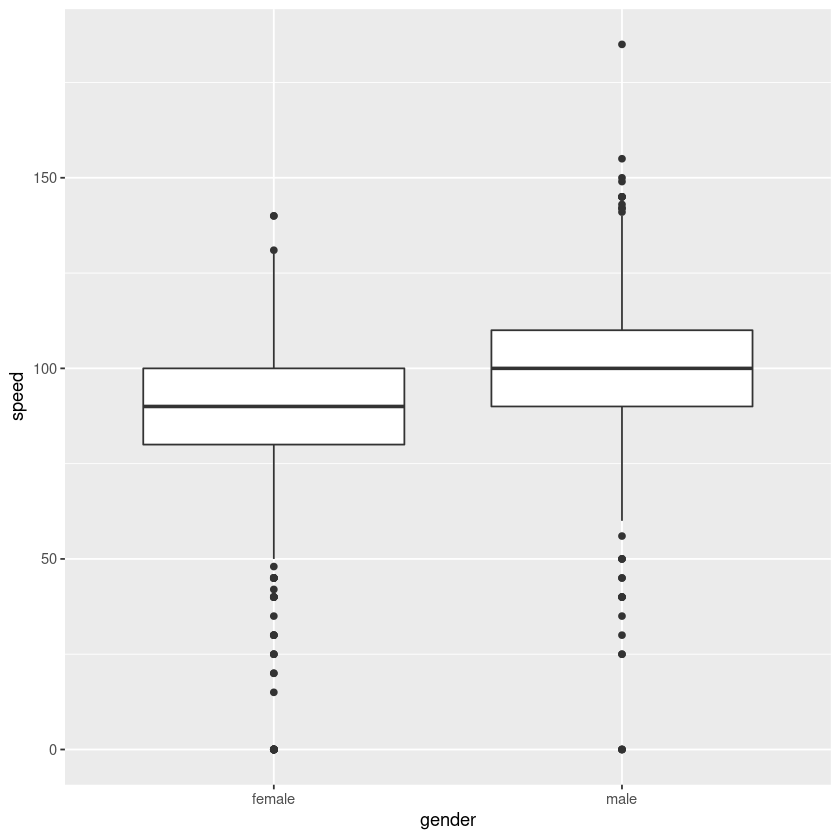

In [1]:
Speed <- read.csv("../data/speed-gender-height.csv")
ggplot(Speed) + geom_boxplot(aes(x=gender, y=speed), na.rm=TRUE)

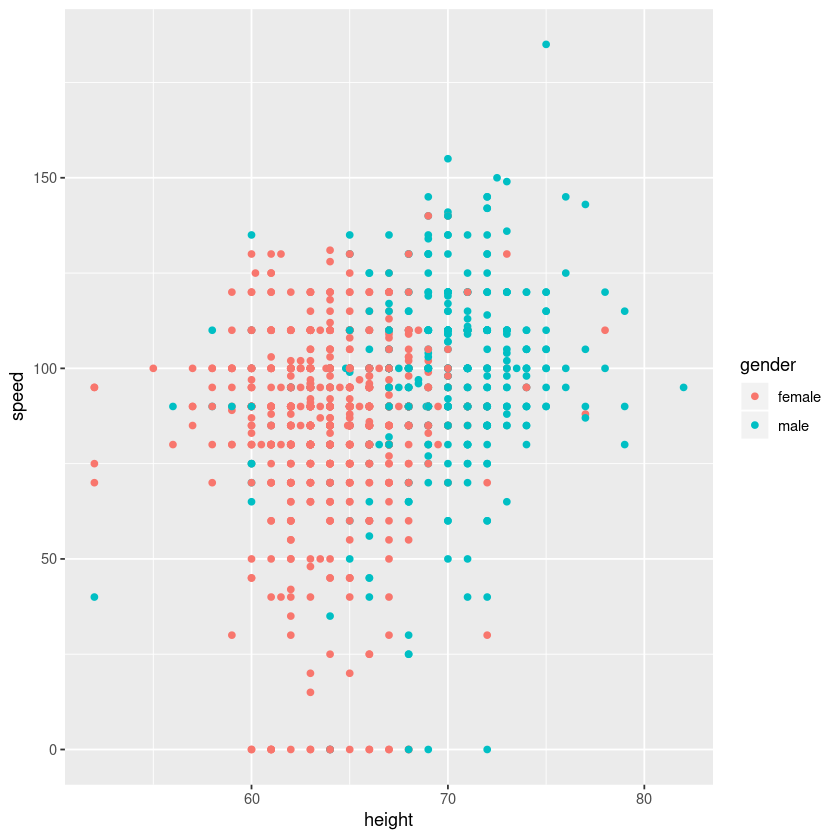

In [4]:
ggplot(Speed) + geom_point(aes(x=height, y=speed, color=gender), na.rm=TRUE)